## 2層ニューラルネットワークの実装

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
       
        return y
       
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
       
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grad

In [6]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [19]:
net.params['W1'].shape

(784, 100)

In [8]:
net.params['W2'].shape

(100, 10)

In [9]:
net.params['b1'].shape

(100,)

In [10]:
net.params['b2'].shape

(10,)

In [13]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

In [14]:
grads = net.numerical_gradient(x, t)

In [31]:
grads['W1'].shape

(784, 100)

In [32]:
grads['W2'].shape

(100, 10)

In [33]:
grads['b1'].shape

(100,)

In [34]:
grads['b2'].shape

(10,)

## MNISTデータセットを用いた学習
下図は訓練データとテストデータに対する認識精度の推移.

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.79915, 0.8022
train acc, test acc | 0.87695, 0.8798
train acc, test acc | 0.8978333333333334, 0.901
train acc, test acc | 0.90765, 0.9113
train acc, test acc | 0.9136333333333333, 0.9167
train acc, test acc | 0.91935, 0.9209
train acc, test acc | 0.92385, 0.9249
train acc, test acc | 0.9280833333333334, 0.9295
train acc, test acc | 0.92995, 0.932
train acc, test acc | 0.9340333333333334, 0.9339
train acc, test acc | 0.9376, 0.9368
train acc, test acc | 0.9393666666666667, 0.9384
train acc, test acc | 0.9412, 0.9395
train acc, test acc | 0.9439166666666666, 0.9427
train acc, test acc | 0.9457833333333333, 0.9441
train acc, test acc | 0.9480833333333333, 0.9454
gradient_time: 0.0005462169647216797


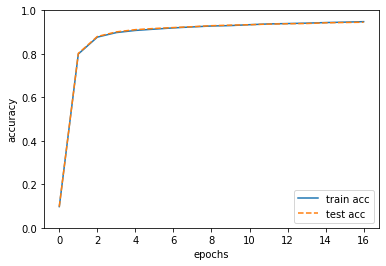

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from time import time

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) 

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) 

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) 

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    start = time()
    
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    end = time() - start
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

print("gradient_time: " + str(end))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

数値微分による計算と誤差逆伝播法でかかる時間をtimeモジュールを用いて検証してみようとした. 誤差逆伝播法を用いた場合, 出力結果にあるようにおよそ5.5×10^-4と高速であることが確認できた. しかし, 数値微分の場合,一組目が出力された後, 2分ほど経過しても次が出力されなかったのでプログラムを停止した. 実際の数値は計測できなかったが, 2つの手法は実行時間に大きな違いがあることは分かった.

## 感想
今回はグラフに書くことで視覚的にも理解しやすかった. 前回までの範囲で曖昧だった部分の復習にもなってよかった.

## 参考文献
斎藤 康毅　『ゼロから作るDeep Learning』, 2019, オライリー・ジャパン, p.83-122